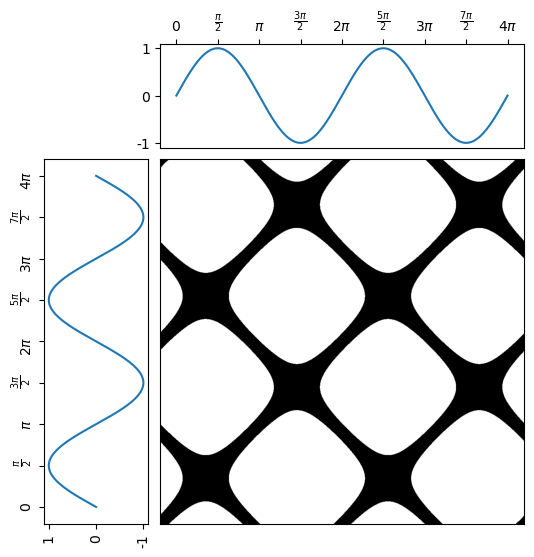

In [1]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Recurrence plot transformation
rp = RecurrencePlot(threshold=0.3)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

In [2]:
#Logistic map bifurcation diagram, source: https://github.com/Alain1405/bifurcation_diagrams
# Logistic function implementation
def logistic_eq(r,x):
    return r*x*(1-x)

"""
# Iterate the function for a given r
def logistic_equation_orbit(seed, r, n_iter, n_skip=0):
    print('Orbit for seed {0}, growth rate of {1}, plotting {2} iterations after skipping {3}'.format(seed, r, n_iter, n_skip))
    X_t=[]
    T=[]
    t=0
    x = seed
    # Iterate the logistic equation, printing only if n_skip steps have been skipped
    for i in range(n_iter + n_skip):
        if i >= n_skip:
            X_t.append(x)
            T.append(t)
            t+=1
        x = logistic_eq(r,x)
    # Configure and decorate the plot
    plt.plot(T, X_t)
    plt.ylim(0, 1)
    plt.xlim(0, T[-1])
    plt.xlabel('Time t')
    plt.ylabel('X_t')
    plt.show()
"""

# Create the bifurcation diagram
def bifurcation_diagram(seed, n_skip, n_iter, step=0.0001, r_min=0):
    print("Starting with x0 seed {0}, skip plotting first {1} iterations, then plot next {2} iterations.".format(seed, n_skip, n_iter))
    # Array of r values, the x axis of the bifurcation plot
    R = []
    # Array of x_t values, the y axis of the bifurcation plot
    X = []
    
    # Create the r values to loop. For each r value we will plot n_iter points
    r_range = np.linspace(r_min, 4, int(1/step))

    for r in r_range:
        x = seed
        # For each r, iterate the logistic function and collect datapoint if n_skip iterations have occurred
        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic_eq(r,x)
    # Plot the data    
    return R, X
    plt.plot(R, X, ls='', marker=',')
    plt.ylim(0, 1)
    plt.xlim(r_min, 4)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()



#bifurcation_diagram(0.2, 100, 5)
#bifurcation_diagram(0.2, 100, 10)
#bifurcation_diagram(0.2, 100, 10, r_min=2.8)



Starting with x0 seed 0.2, skip plotting first 100 iterations, then plot next 5 iterations.


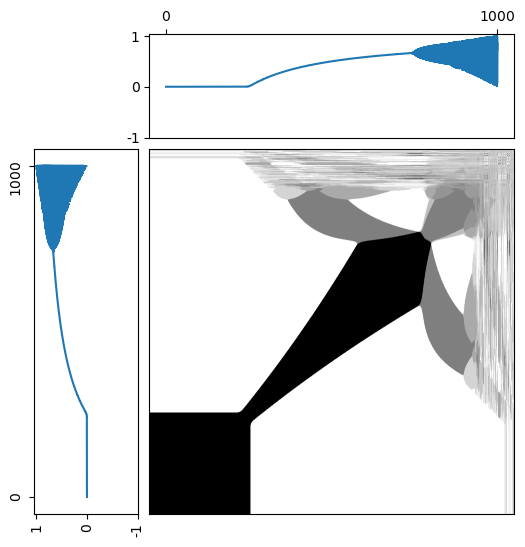

In [8]:
#RP of logistic map bifurcation diagram analogous to above
time_points, x = bifurcation_diagram(0.2, 100, 5, 0.001)
X = np.array([x])

# Recurrence plot transformation
rp = RecurrencePlot(threshold=0.1)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4, 2)
time_ticklabels = [r'$0$', r'$1000$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4, 0, 4])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

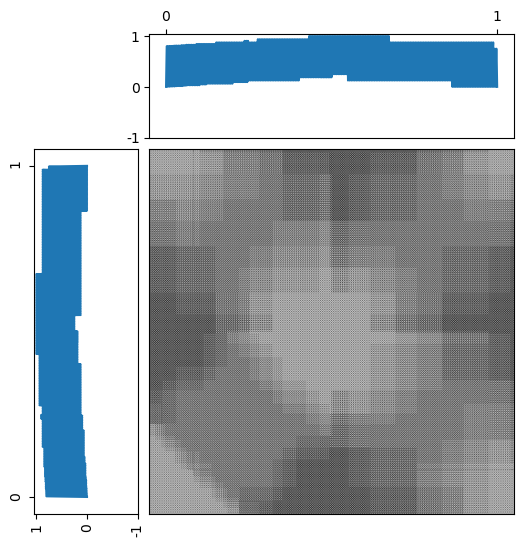

In [10]:
#functions generated with ChatGPT
# Define the Sawtooth map function
def sawtooth_map(x):
    return np.where(x < 0.5, 2 * x, 2 - 2 * x)

# Define the Baker's map function
def bakers_map(x):
    return np.where(x < 0.5, 2 * x, 2 * (1 - x))

# Generate initial data
num_points = 1000
x_values = np.linspace(0, 1, num_points)

# Function to iterate the map
def iterate_map(map_func, x_values, iterations):
    for _ in range(iterations):
        x_values = map_func(x_values)
    return x_values

# Generate initial data
num_points = 1000
iterations = 50  # Number of iterations
x_values = np.linspace(0, 1, num_points)

# Generate data for the Sawtooth map
sawtooth_values = iterate_map(sawtooth_map, x_values, iterations)

# Generate data for the Baker's map
bakers_values = iterate_map(bakers_map, x_values, iterations)


# Recurrence plot transformation
rp = RecurrencePlot(threshold=0.3)
X_rp = rp.transform(sawtooth_values.reshape(1, -1))

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 1, 2)
time_ticklabels = [r'$0$', r'$1$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(sawtooth_values, x_values)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(x_values, sawtooth_values)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 1, 0, 1])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

In [ ]:
#generated with ChatGPT
from scipy.integrate import odeint

# Define the Lorenz system of equations
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Function to generate data for the Lorenz system
def generate_lorenz_data(initial_state, t, sigma=10, rho=28, beta=8/3):
    # Integrate the Lorenz equations
    state = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
    return state

# Parameters
initial_state = [1.0, 1.0, 1.0]  # Initial conditions for x, y, z
t = np.linspace(0, 50, 10000)  # Time vector

# Generate Lorenz data
lorenz_data = generate_lorenz_data(initial_state, t)

# Recurrence plot transformation
rp = RecurrencePlot(threshold=0.3)
X_rp = rp.transform(lorenz_data.reshape(1, -1))

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

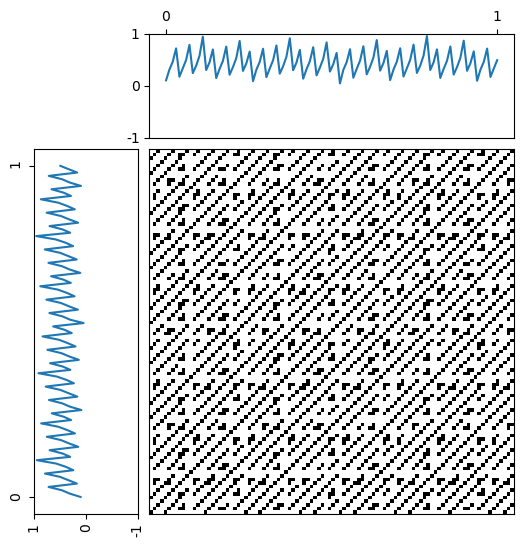

In [20]:
# Define the Circle Map function
def circle_map(x, alpha, bigK):
    return (x + alpha - bigK/(2*np.pi)*np.sin(2*np.pi*x)) % 1

# Function to generate data for the Circle Map
def generate_circle_map_data(initial_value, alpha, bigK, iterations):
    x_values = np.zeros(iterations)
    x_values[0] = initial_value
    
    for i in range(1, iterations):
        x_values[i] = circle_map(x_values[i - 1], alpha, bigK)
    
    return x_values

# Parameters
initial_value = 0.1  # Initial condition
alpha = 0.3  # Chaotic value for alpha (irrational)
bigK = 1.0
iterations = 100  # Number of iterations
x_values = np.linspace(0, 1,  iterations)

# Generate Circle Map data
circle_map_data = generate_circle_map_data(initial_value, alpha, bigK, iterations)

# Recurrence plot transformation
rp = RecurrencePlot(threshold=0.1)
X_rp = rp.transform(circle_map_data.reshape(1, -1))

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

#Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 1, 2)
time_ticklabels = [r'$0$', r'$1$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(circle_map_data, x_values)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(x_values, circle_map_data)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 1, 0, 1])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()